In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import json

In [2]:
DATASET_DIR = 'Tomato Dataset/' 

In [3]:
#Setup ImageDataGenerator with data augmentation
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=20,
    zoom_range=0.2,
    horizontal_flip=True
)

In [4]:
#Create training and validation generators
IMG_SIZE = (224, 224) 

train_generator = datagen.flow_from_directory(
    DATASET_DIR,
    target_size=IMG_SIZE,
    batch_size=32,
    class_mode='categorical',
    subset='training',
    shuffle=True
)

val_generator = datagen.flow_from_directory(
    DATASET_DIR,
    target_size=IMG_SIZE,
    batch_size=32,
    class_mode='categorical',
    subset='validation',
    shuffle=False
)

Found 12813 images belonging to 10 classes.
Found 3198 images belonging to 10 classes.


In [5]:
#Preview class labels
print("Class indices (label mapping):")
print(train_generator.class_indices)

Class indices (label mapping):
{'Tomato_Bacterial_spot': 0, 'Tomato_Early_blight': 1, 'Tomato_Late_blight': 2, 'Tomato_Leaf_Mold': 3, 'Tomato_Septoria_leaf_spot': 4, 'Tomato_Spider_mites_Two_spotted_spider_mite': 5, 'Tomato__Target_Spot': 6, 'Tomato__Tomato_YellowLeaf__Curl_Virus': 7, 'Tomato__Tomato_mosaic_virus': 8, 'Tomato_healthy': 9}


In [6]:
# Optional- Save class label mapping to JSON
with open("label_map.json", "w") as f:
    json.dump(train_generator.class_indices, f)

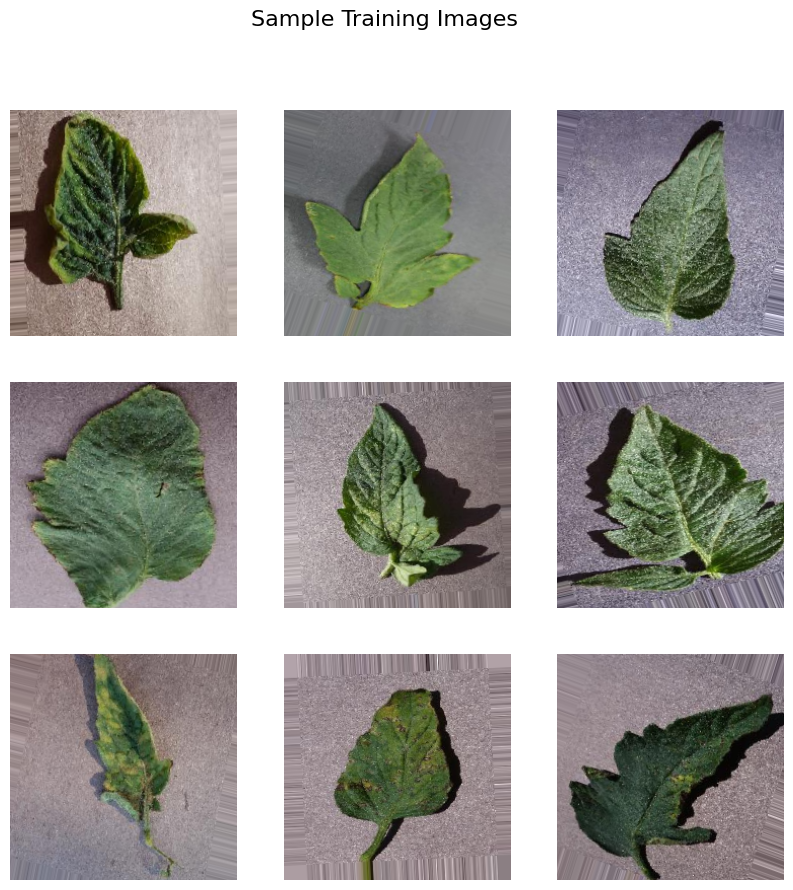

In [7]:
#Preview a batch of training images
x_batch, y_batch = next(train_generator)
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(x_batch[i])
    plt.axis('off')
plt.suptitle("Sample Training Images", fontsize=16)
plt.show()